Import libraries

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load dataset

In [132]:

df = pd.read_csv(r"C:\Users\noufi\Downloads\COVID clinical trials.csv")
df.shape

(5783, 27)

Initial data exploration

In [133]:
print(df.head()) #print first 5 rows
print(df.info())
print(df.describe())
print(df.describe(include='object')) #summary statistics for categorical columns

   Rank   NCT Number                                              Title  \
0     1  NCT04785898  Diagnostic Performance of the ID Now™ COVID-19...   
1     2  NCT04595136  Study to Evaluate the Efficacy of COVID19-0001...   
2     3  NCT04395482  Lung CT Scan Analysis of SARS-CoV2 Induced Lun...   
3     4  NCT04416061  The Role of a Private Hospital in Hong Kong Am...   
4     5  NCT04395924         Maternal-foetal Transmission of SARS-Cov-2   

        Acronym                  Status         Study Results  \
0   COVID-IDNow  Active, not recruiting  No Results Available   
1      COVID-19      Not yet recruiting  No Results Available   
2   TAC-COVID19              Recruiting  No Results Available   
3      COVID-19  Active, not recruiting  No Results Available   
4  TMF-COVID-19              Recruiting  No Results Available   

                                          Conditions  \
0                                            Covid19   
1                               SARS-CoV-2 Inf

Handling missing data

In [ ]:
print(df.isnull().sum()) # check for missing values
df = df.drop(columns=['Acronym', 'Study Documents'])
#df['Results First Posted'].fillna('Unknown', inplace=True)
#print('Acronym' in df.columns)      #to check the columns dropped
#print('Study Documents' in df.columns)   
#print(df['Results First Posted'].isnull().sum())

Rank                          0
NCT Number                    0
Title                         0
Acronym                    3303
Status                        0
Study Results                 0
Conditions                    0
Interventions               886
Outcome Measures             35
Sponsor/Collaborators         0
Gender                       10
Age                           0
Phases                     2461
Enrollment                   34
Funded Bys                    0
Study Type                    0
Study Designs                35
Other IDs                     1
Start Date                   34
Primary Completion Date      36
Completion Date              36
First Posted                  0
Results First Posted       5747
Last Update Posted            0
Locations                   585
Study Documents            5601
URL                           0
dtype: int64


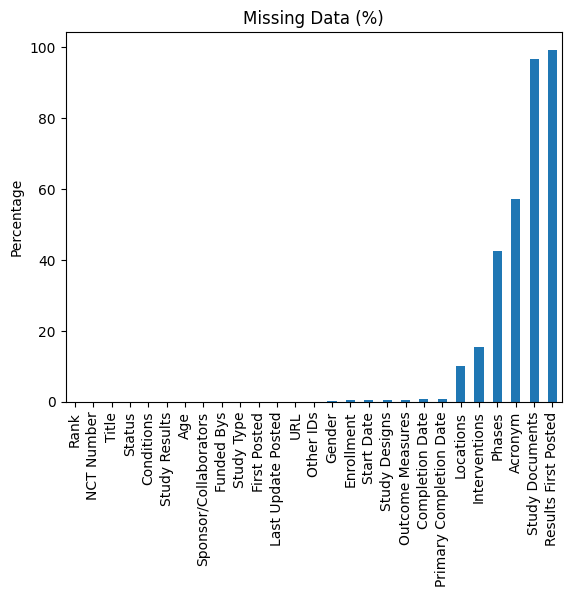

In [135]:
missing_data = df.isnull().mean() * 100
missing_data.sort_values(ascending=True).plot(kind='bar', title='Missing Data (%)', ylabel='Percentage')
plt.xticks(rotation=90)
plt.show()

In [138]:
df.drop(columns=['Study Documents', 'Results First Posted'], inplace=True, errors='ignore') #errors='ignore' drops the colun if found , otherwise it skip silently if doesn't exist
print(df.columns)

Index(['Rank', 'NCT Number', 'Title', 'Acronym', 'Status', 'Study Results',
       'Conditions', 'Interventions', 'Outcome Measures',
       'Sponsor/Collaborators', 'Gender', 'Age', 'Phases', 'Enrollment',
       'Funded Bys', 'Study Type', 'Study Designs', 'Other IDs', 'Start Date',
       'Primary Completion Date', 'Completion Date', 'First Posted',
       'Last Update Posted', 'Locations', 'URL'],
      dtype='object')


In [ ]:
#NaN values don't come up in value counts. so to avoid that, we are replacing with that particular column
for col in df.select_dtypes(include='object').columns:
    if df[col].isnull().sum() > 0:
        df[col].fillna(f"Missing {col}", inplace=True)

print(df['Gender'].unique())



['All' 'Female' 'Male' 'Missing Gender']


Univariate visualizations

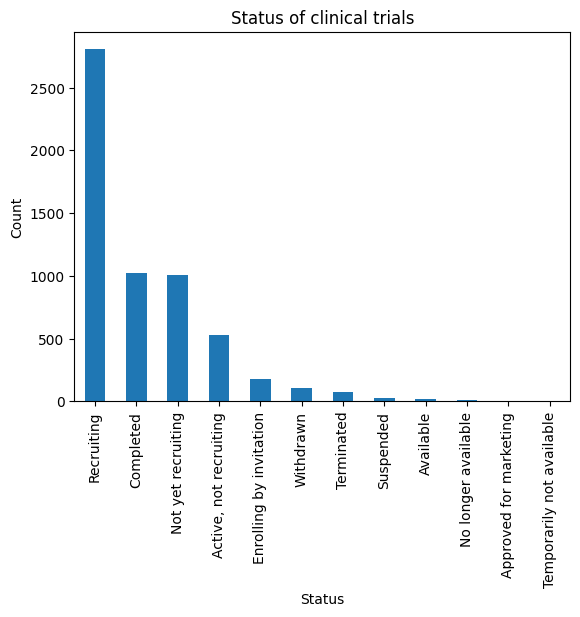

In [144]:
df['Status'].value_counts().plot(kind='bar', title='Status of clinical trials')
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

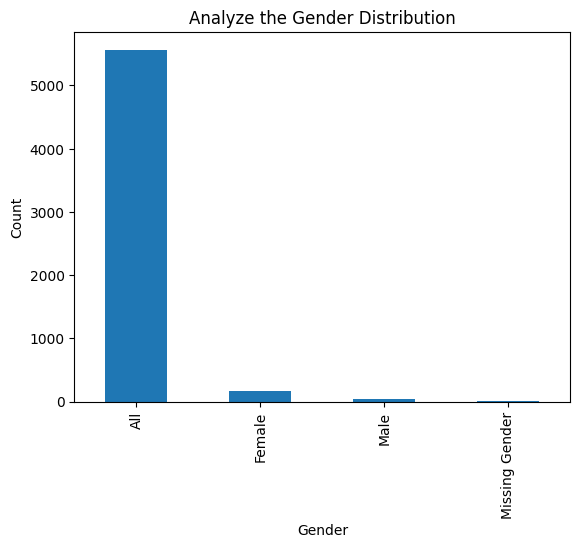

In [148]:
df['Gender'].value_counts().plot(kind='bar', title='Analyze the Gender Distribution')
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

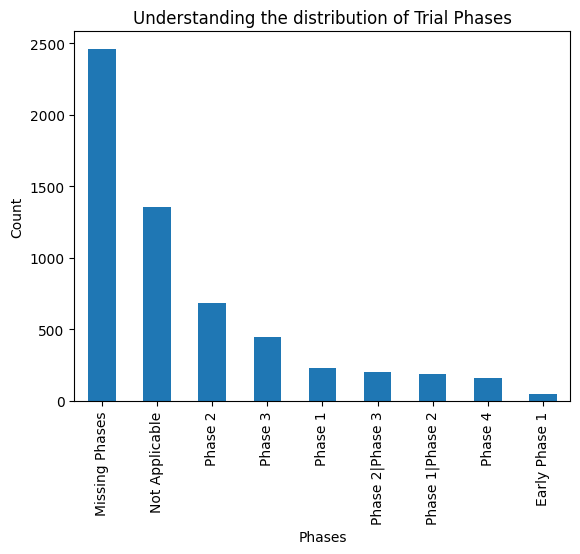

In [147]:
df['Phases'].value_counts().plot(kind='bar', title='Understanding the distribution of Trial Phases')
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

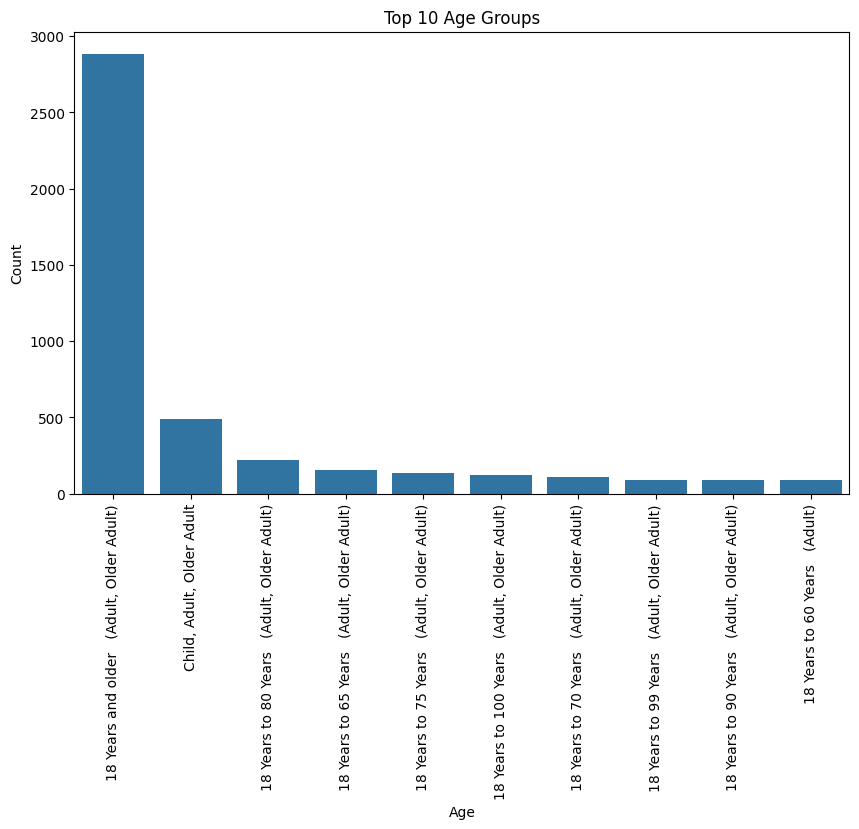

In [ ]:
# I have taken only top 10 frequent age groups
top_ages = df['Age'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_ages.index, y=top_ages.values)
plt.title("Top 10 Age Groups")
plt.xticks(rotation=90)
plt.ylabel("Count")
plt.show()


Bivariate analysis

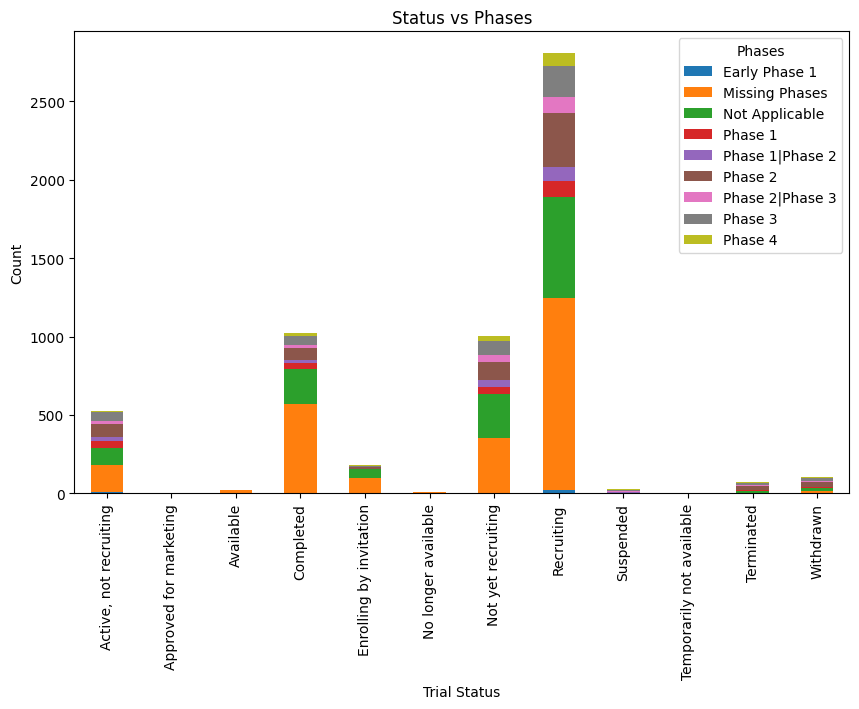

In [163]:
# status vs phases
status_phase = pd.crosstab(df['Status'], df['Phases'])
status_phase.plot(kind='bar', stacked=True, figsize=(10,6), title='Status vs Phases')
plt.xlabel("Trial Status")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()



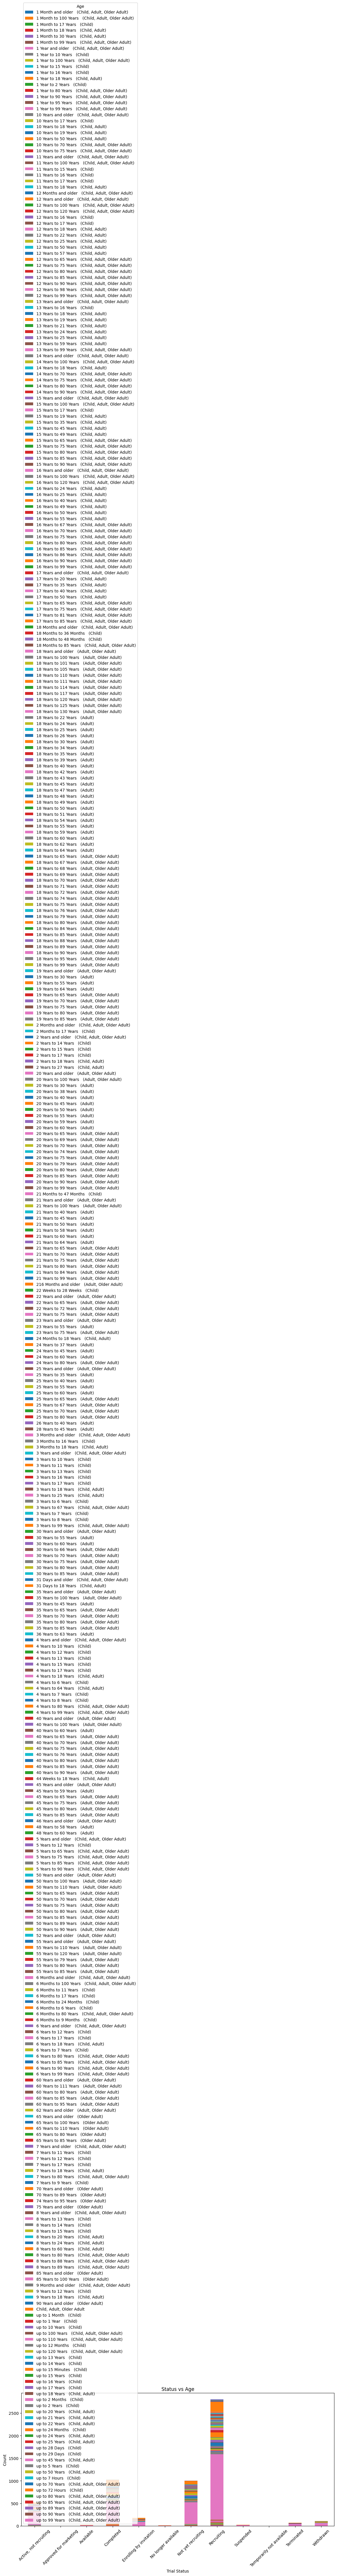

In [ ]:
# Status vs Age
status_age = pd.crosstab(df['Status'], df['Age'])
status_age.plot(kind='bar', stacked=True, figsize=(14,6), title='Status vs Age')
plt.xlabel("Trial Status")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


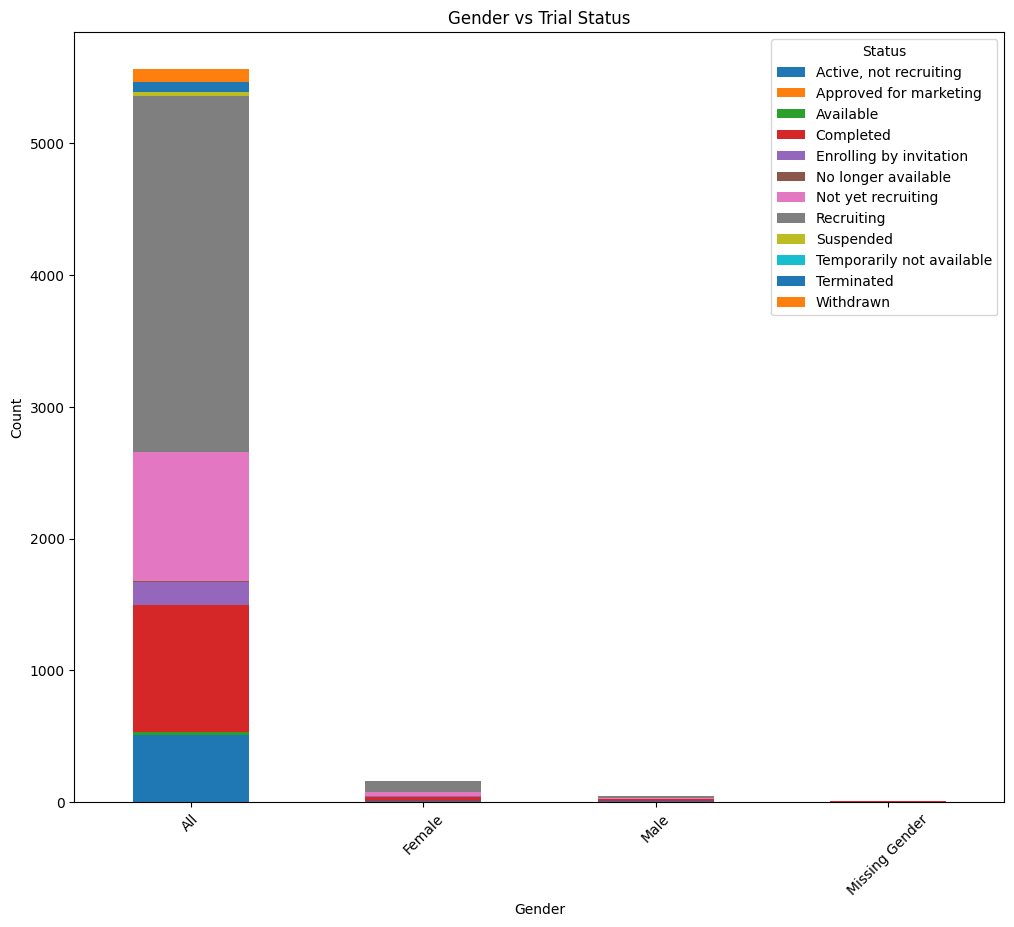

In [ ]:
#Gender vs Trial Status
gender_status = pd.crosstab(df['Gender'], df['Status'])
gender_status.plot(kind='bar', stacked=True, figsize=(12,10), title='Gender vs Trial Status')
plt.xlabel("Gender")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


Time series analysis

In [ ]:
#convert date columns to datetime
df['Start Date'] = pd.to_datetime(df['Start Date'],errors='coerce') # 'errors= coerce' it will set the value to NaT 
df['Primary Completion Date'] = pd.to_datetime(df['Primary Completion Date'], errors='coerce')


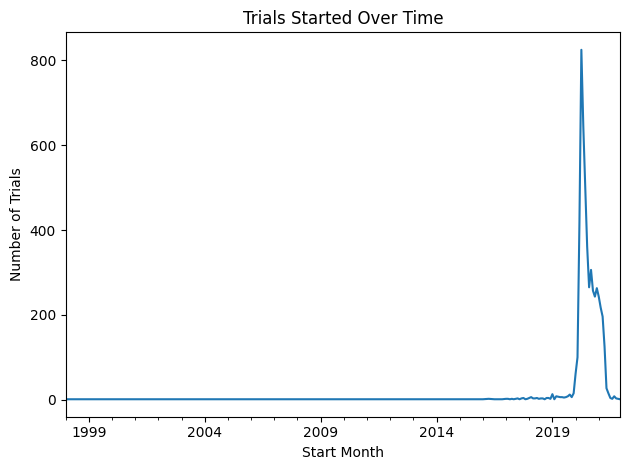

In [169]:
df['Start Month'] = df['Start Date'].dt.to_period('M')
df['Start Month'].value_counts().sort_index().plot(kind='line', title='Trials Started Over Time')
plt.xlabel("Start Month")
plt.ylabel("Number of Trials")
plt.tight_layout()
plt.show()

In [171]:
# save the cleaned data
df.to_csv('cleaned_covid_clinical_trials.csv', index=False)